# organoid Notebook

In [1]:
from organoid import segmentation
from organoid import preprocessing
from organoid import reconstruction
import matplotlib.pyplot as plt
import tifffile


pyklb library not found, klb files will not be generated


IO.py (31): KLB library is not installed


Example of usage of segmentation functions

In [ ]:
path = rf'C:\Users\gros\Desktop\DATA\organoid_test'
data = tifffile.imread(rf'{path}\data.tif')
dapi=data[:,0,:,:]
stardist_model = rf'C:\Users\gros\Desktop\CODES\Alice_Segmentation\Stardist\models\lennedist_3d_grid222_rays64'

In [ ]:
output = segmentation.predict_stardist(data,model_path=stardist_model,input_voxelsize=[1,1,1],normalize_input=True)

In [2]:
num_g=1
path_to_data = r"C:\Users\gros\Desktop\DATA\Fucci_seg\0210_1"
path_output = path_to_data
seg = tifffile.imread(rf'{path_to_data}\{num_g}_seg.tif')
mask = tifffile.imread(rf'{path_to_data}\dapi_iso_mask.tif')
mvenus = tifffile.imread(rf'{path_to_data}\mvenus_blur.tif')
mcherry = tifffile.imread(rf'{path_to_data}\mcherry_blur.tif')

In [3]:
Intensity_Distrib=segmentation.find_seg_errors(segmentation = seg,image = mvenus)

5277  labels to process


5277it [01:12, 72.73it/s]


Text(0, 0.5, 'std/mean intensity')

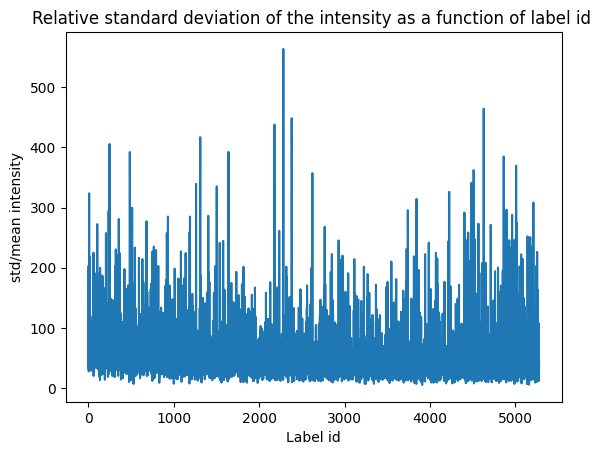

In [4]:
plt.plot(list(Intensity_Distrib[:,0]),list(Intensity_Distrib[:,3]))
plt.title('Relative standard deviation of the intensity as a function of label id ')
plt.xlabel('Label id')
plt.ylabel('std/mean intensity')
#we can see that the std/mean intensity is very high for some labels, lets visualize them, starting with a threshold of 300

In [5]:
thresh=300
list_wrong_labels = segmentation.tresh_distribution(Intensity_Distrib,threshold=thresh,column_number=3)
print(list_wrong_labels)

[11, 12, 250, 488, 1263, 1312, 1505, 1643, 2180, 2284, 2382, 2624, 3843, 4225, 4486, 4511, 4629, 4863, 5008, 5210]


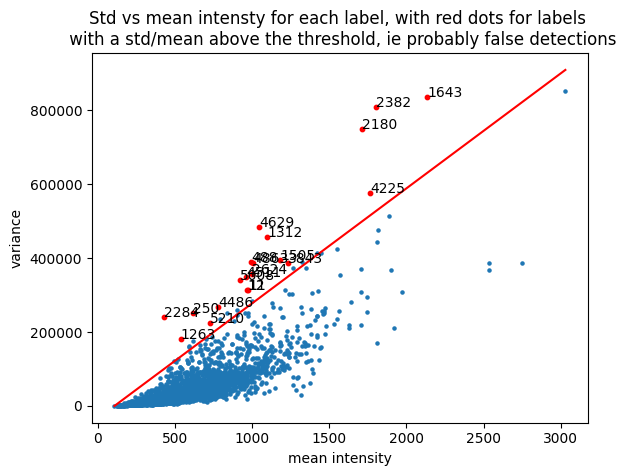

In [12]:
fig, ax = plt.subplots()

ax.scatter(list(Intensity_Distrib[:,1]),list(Intensity_Distrib[:,2]),s=5) #plot all the points : std vs mean
    
for id in list_wrong_labels: #only for sgegmentation errors : plot a red dot and the label in question
    label=id-1
    ax.annotate(int(id), ((Intensity_Distrib[label,1],Intensity_Distrib[label,2])))
    ax.scatter(Intensity_Distrib[label,1],Intensity_Distrib[label,2],s=10,c='r')

ax.plot([min(Intensity_Distrib[:,1]),max(Intensity_Distrib[:,1])],[min(Intensity_Distrib[:,1]),thresh*max(Intensity_Distrib[:,1])],c='r') #line of chosen treshhold
plt.xlabel('mean intensity')    
plt.ylabel('variance')
plt.title('Std vs mean intensty for each label, with red dots for labels \n with a std/mean above the threshold, ie probably false detections')
plt.show()

Example of usage of reconstruction functions

In [ ]:
path = rf'Z:\EqpLenne2\Alice\Lecuit_biphoton\13072023_divrates_FGFA\72h'
reconstruction.plot_positions(path_bottom_positions=rf'{path}\multipoints_bottom.xml',
                              path_top_positions=rf'{path}\multipoints_top.xml')
print(reconstruction.associate_top_bottom(path_bottom_positions=rf'{path}\multipoints_bottom.xml',path_top_positions=rf'{path}\multipoints_top.xml'))

In [ ]:
path = rf'C:\Users\gros\Desktop\DATA\organoid_test\Registration'
path_to_bin = rf'C:\Users\gros\Anaconda3\envs\registration-env\Library\bin'
list_bottom=[1] #the length of this list corresponds to the number of samples.
list_top=[1]
channels=['dapi','ph3','bra','ecad']

In [ ]:
#Creates folder structure
reconstruction.create_folders(path,list_bottom,list_top,channels)

In [ ]:
#from now on, we consider only one sample. If you have multiple samples, you can loop over the parameter 'sample_id'

#register the reference channel first
reconstruction.register(path,path_to_bin=path_to_bin,sample_id='1',channel='dapi',input_voxel=[0.62,0.62,2],
                        output_voxel=[1,1,1],compute_trsf=1,init_trsfs=[["flip", "Y", "flip", "Z", "trans", "Z", -10]],
                        trsf_type='rigid',depth=3,save_json=True)

#and the others using the same transformation
for channel in channels[1:]:
    print(channel)
    reconstruction.register(path,path_to_bin=path_to_bin,sample_id='1',channel=channel,input_voxel=[0.62,0.62,2],
                            output_voxel=[1,1,1],compute_trsf=0,save_json=False)


In [ ]:
#Visualising the result
reconstruction.check_napari(path, sample_id= '1',channel = 'ecad')

In [ ]:
#Fuse the 2 registered sides into one array
reconstruction.fuse_sides(path,sample_id='1', channels=channels)

In [ ]:
#Fuse all the channels in one image
reconstruction.write_hyperstacks(path, sample_id='1',channels=channels)